# Week 8 - Employee Attrition
- Day 50: Choose Dataset
- Day 51: EDA
- Day 52: Data Cleaning + Features
- Day 53: Modeling
- Day 54: Hyperparameters tuning
- Day 55: Final Evaluation
- Day 56: Report + Publish

## Day 50: Choose Dataset
- Pick one project, define problem, set up folder
- Collect dataset

In [1]:
#OpenML “IBM Employee Attrition” dataset (OpenML data_id=43893) that mirrors the popular IBM HR attrition dataset 

import pandas as pd
from sklearn.datasets import fetch_openml

ds = fetch_openml(data_id=43893, as_frame=True)

data = ds.frame # includes features + target (if provided in the OpenML task)
print(data.shape)
print(data.head())


(1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLeve

- Education (1–5): 1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor 
- EnvironmentSatisfaction (1–4): 1 Low, 2 Medium, 3 High, 4 Very High 
- JobInvolvement (1–4): 1 Low, 2 Medium, 3 High, 4 Very High 
- JobSatisfaction (1–4): 1 Low, 2 Medium, 3 High, 4 Very High 
- RelationshipSatisfaction (1–4): 1 Low, 2 Medium, 3 High, 4 Very High 
- WorkLifeBalance (1–4): 1 Bad, 2 Good, 3 Better, 4 Best 
- PerformanceRating (1–4): 1 Low, 2 Good, 3 Excellent, 4 Outstanding


In [2]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [3]:
df = data.copy()

In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Goal
Predict which employees are at risk of attrition so HR/People Ops can prioritize retention interventions. 

### Decision framing
- Intended user: HR business partners / People operations (Ops)
- Decision: Each month, create a shortlist of employees to proactively reach out to (manager coaching, compensation review, role alighment, etc. ).
- Constraints: Interventions have limited capacity (eg. can only proactively engage top K employees per month).
- Risk trade-off:
    - False Negative (FN): miss an at-risk employee -> higher cost
        - FN: reality is ppl will leave but your modeling result says no
    - False Positive (FP): outreach to a low-risk employee -> lower cost but still consumes capacity (eg. spend time or resources on wrong person)
        - FP: reality is ppl will not leave but you predict he/she is leaving. 
- Threshold decision
    - Most models output a probability (e.g., 0.27 chance of leaving). You decide a cutoff:
    - If you lower the threshold (e.g., flag at-risk if p ≥ 0.20):
        - You catch more true at-risk employees → FNs decrease
        - But you also flag more people unnecessarily → FPs increase
    - If you raise the threshold (e.g., p ≥ 0.60):
        - You reduce wasted outreach → FPs decrease
        - But you miss more at-risk employees → FNs increase
    -  Because your note says FN cost > FP cost, you usually prefer a threshold that leans toward catching more at-risk employees, within your outreach capacity.


## Day 51 - EDA
- Explore features
- visualize patterns
- correlations


In [5]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Delete irrelevent columns
- EmployeeCount
- Over18
- StandardHours
- EmployeeNumber

In [6]:

# Some columns just have one unique value - drop them
for i in df.columns.tolist():
    n_unique = df[i].nunique(dropna=False)
    
    if n_unique <= 1: 
        print(i)
        df = df.drop(columns=[i])

# Drop employee id 
df = df.drop(columns=["EmployeeNumber"])
df.shape


EmployeeCount
Over18
StandardHours


(1470, 31)

### Exam the target

In [7]:

import plotly.express as px

#counts = df["Attrtion"].value_couints(dropna=False)
#fig = px.pie(df, values=counts.values, names=counts.index, title="Attrition")
fig = px.pie(df, names="Attrition", title="Employee Attrition Rate")
fig.show()

 It's a inbalanced dataset with positive rate of 16.1%. 

### Plot for numerical variables

In [8]:
cont_num_cols = [
    "Age",
    "DailyRate",
    "DistanceFromHome",
    "HourlyRate",
    "MonthlyIncome",
    "MonthlyRate",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "TotalWorkingYears",
    "TrainingTimesLastYear",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
]

for col in cont_num_cols:
    fig = px.histogram(df, x=col, color="Attrition", histnorm="percent", barmode="overlay",
                       opacity=0.6, title=f"Distribution of {col} by EmployeeAttrition")
    
    fig.show()             

For these overlay plots:
- Y-axis is **percent within each Attrition class** (Yea/No each sums to 100%), so they are comparing relative concentration by x-trange.
- Where the **"Yes" bars are higher than "No"** that range is more common among leavers. 

Interpretation for this dataset
- Strongest differences: 
    - Age (Yes skews younger)
    - MonthlyIncome (Yes concentrated at lower income)
    - tenure/experience (Yes is heavier at low values with No having longer right tails)
        - TotalWorkingYears, 
        - YearsAtCompany, 
        - YearsInCurrentRole, 
        - YearsWithCurrManager
- Moderate:
    - DistanceFromHome shows a mild shift toward longer distances for Yes, but lots of overlap
- Weak/none:
    - HourlyRate, MonthlyRate, PercentSalaryHike largely overlap
    - DailyRate and TrainingTimesLastYear are subtle

### Plot for categorical variables

In [9]:
cat_cols = [
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "OverTime",
    "Education",
    "EnvironmentSatisfaction",
    "JobInvolvement",
    "JobLevel",
    "JobSatisfaction",
    "PerformanceRating",
    "RelationshipSatisfaction",
    "StockOptionLevel",
    "WorkLifeBalance",
]

target_col = "Attrition"

for col in cat_cols:
    fig = px.histogram(df, x=col, color=target_col, barmode="group", histnorm="percent",
             title=f"Distribution of {col} by Attrition")
    fig.show()




Main patterns in the dataset (overall attrition ≈ 16.1%):

- OverTime is the strongest: Yes ≈ 30.5% vs No ≈ 10.4%.
- JobRole varies a lot: Sales Representative ≈ 39.8% (high) vs Research Director ≈ 2.5% (low).
- BusinessTravel: Travel_Frequently ≈ 24.9% vs Non-Travel ≈ 8.0%.
- MaritalStatus: Single ≈ 25.5% vs Divorced ≈ 10.1% / Married ≈ 12.5%.
- Clear “ordinal” trends: low EnvironmentSatisfaction / JobSatisfaction / JobInvolvement / WorkLifeBalance levels have higher attrition (e.g., JobInvolvement=1 ≈ 33.7% vs 4 ≈ 9.0%).
- Weak/near none: PerformanceRating is basically flat (~16%); Gender is a small gap (Male 17.0% vs Female 14.8%).
- Note: some categories are small (e.g., EducationField=Human Resources has n=27), so treat those spikes as less reliable.

### Feature correlation plot

In [10]:
# Correlation heatmap (numeric features)
corr = df[cont_num_cols].corr(numeric_only=True)

fig = px.imshow(corr, color_continuous_scale="RdBu_r", zmin=-1, zmax=1, #lower and upper bound
                title="Numeric Feature correlation Heatmap")
fig.update_layout(width=900, height=900)
fig.show()

Interpretation:
1) A clear “tenure / seniority” cluster (high redundancy)
- These variables are strongly positively correlated with each other:
    - YearsAtCompany
    - YearsInCurrentRole
    - YearsWithCurrManager
    - YearsSinceLastPromotion
    - TotalWorkingYears (also tied into this cluster)
- Interpretation: these features are largely measuring overlapping concepts: tenure, stability, and seniority. When one is high, several others tend to be high too.
- Why you care: This is classic multicollinearity/redundancy.
2) MonthlyIncome is strongly tied to seniority/experience
- MonthlyIncome shows strong positive correlation with:
    - TotalWorkingYears (very strong)
    - YearsAtCompany / YearsInCurrentRole / YearsWithCurrManager (moderate-to-strong)
    - Age (moderate)
- Interpretation: income is acting as a proxy for seniority/experience.
3) Many other numeric features are close to independent
- These look near zero correlation with most others:
    - DailyRate, HourlyRate, MonthlyRate
    - DistanceFromHome
    - PercentSalaryHike
    - TrainingTimesLastYear
- Interpretation: these may contribute distinct signal (not redundant with the tenure/income cluster), or they may simply be weak predictors—this heatmap alone doesn’t tell you which.
4) Almost no strong negative correlations
- You’re not seeing “trade-off” relationships (blue blocks). Most relationships are neutral or positive.


In [11]:
import numpy as np

corr = df[cont_num_cols].corr(method="spearman")  # or "pearson"
thr = 0.8

pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        .stack()
        .sort_values(key=lambda s: s.abs(), ascending=False)
)

print(pairs[pairs.abs() >= thr])

YearsAtCompany  YearsInCurrentRole      0.854000
                YearsWithCurrManager    0.842803
dtype: float64


- Logistic Regression baseline: keep the features but use Ridge. (or delete one of the three)
- Tree/boosted model: keep them all.
- In the report: note “Tenure features are correlated; for linear models we regularize; for tree models we interpret them as a cluster.”


## Day 52 - Data Preprocessing
- Data cleaning + features
- Handle mssing values
- Encoding
- Scaling

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

target_col = "Attrition"

# Drop helper columns if present (created during EDA)
X = df.drop(columns=[target_col, "AttritionFlag"], errors="ignore").copy()
y = df[target_col].map({"No": 0, "Yes": 1})

if y.isna().any():
    raise ValueError(f"Unexpected values in {target_col}: {sorted(df[target_col].unique().tolist())}")


numeric_pipe = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
    ]
)

categorical_pipe = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, cont_num_cols),
        ("cat", categorical_pipe, cat_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_prep = preprocess.fit_transform(X_train)
X_test_prep = preprocess.transform(X_test)

print("X_train shape:", X_train.shape, "->", X_train_prep.shape)
print("X_test  shape:", X_test.shape, "->", X_test_prep.shape)
print("y positive rate (train/test):", y_train.mean().round(3), y_test.mean().round(3))

X_train shape: (1176, 30) -> (1176, 78)
X_test  shape: (294, 30) -> (294, 78)
y positive rate (train/test): 0.162 0.16


## Day 53 - Modeling
- Train classical models
- Train deep models
- Tune hyperparameters

### Logistic Regression with Ridge

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, confusion_matrix

# Logistic Regression with Ridge (L2) regularization
logreg_ridge = LogisticRegression(
    penalty="l2",       # Ridge
    C=1.0,              # smaller C = strongor regularization
    solver="liblinear", # good default for small/medium binary problems
    class_weight="balanced",
    max_iter=500,
    random_state=42,
) 


### LinearSVC (fast)
- No predict_proba

In [14]:
from sklearn.svm import LinearSVC, SVC

linearSVC_model = LinearSVC(C=1.0, class_weight="balanced", random_state=42)



### SVC (kernel)
- Use probability=True if you need predict_proba (slower)

In [15]:
svc_model = SVC(C=1.0, kernel="rbf", class_weight="balanced", probability=True, random_state=42)



### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(
    n_estimators=200,
    max_depth=None, 
    min_samples_leaf=2, 
    class_weight="balanced",
    random_state=42,
    n_jobs=1,
)



### Hist Gradient Boosting Classifier

In [17]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_grad = HistGradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=6,
    max_iter=400,
    random_state=42,
)



### XGBoost

In [18]:
from xgboost import XGBClassifier

pos = int((y_train == 1).sum())
neg = int((y_train == 0).sum())
scale_pos_weight = neg / pos

xgb_model = XGBClassifier(
    n_estimators = 300,
    learning_rate = 0.05,
    max_depth = 4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=1,
)



### LightGBM

In [19]:
from lightgbm import LGBMClassifier

pos = int((y_train == 1).sum())
neg = int((y_train == 0).sum())
scale_pos_weight = neg/pos

lgbm_model = LGBMClassifier(
    n_estimators=600,
    learning_rate=0.03, 
    num_leaves=31,
    max_depth=-1, 
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    scale_pos_weight=scale_pos_weight,
    random_state=42, 
    n_jobs=1,
)



### MLP

In [20]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
    early_stopping=True, 
    validation_fraction=0.15,
    n_iter_no_change=20,
    max_iter=300,
    random_state=42
)

### Summary of baseline models
- Linear: Logistic Regression, Linear SVC
- Nonlinear: Random Forest, SVC (rbf)
- Trees/Ensembles: Random Forest, HistGradientBoosting, XGBoost, LightGBM

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {"roc_auc": "roc_auc", "pr_auc": "average_precision"}

candidates= {
    "LogReg (balanced)": Pipeline([("preprocess", preprocess), ("model", logreg_ridge)]),
    "LinearSVC (balanced)": Pipeline([("preprocess", preprocess), ("model", linearSVC_model)]),
    "SVC RBF (balanced)": Pipeline([("Preprocess", preprocess), ("model", svc_model)]),
    "RandomForest (balanced)": Pipeline([("Preprocess", preprocess), ("model", random_forest)]),
    "HistGB": Pipeline([("preprocess", preprocess), ("model", hist_grad)]),
    "XGBoost": Pipeline([("preprocess", preprocess), ("model", xgb_model)]),
    "LightGBM": Pipeline([("preprocess", preprocess), ("model", lgbm_model)]),
    "MLP": Pipeline([("preprocess", preprocess), ("model", mlp_model)]),
}

rows = []
for name, pipe in candidates.items():
    out = cross_validate(pipe, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)
    rows.append({
        "model":name, 
        "cv_roc_auc_mean": out["test_roc_auc"].mean(),
        "cv_roc_auc_std": out["test_roc_auc"].std(),
        "cv_pr_auc_mean": out["test_pr_auc"].mean(),
        "cv_pr_auc_std": out["test_pr_auc"].std(),
    })

cv_results = pd.DataFrame(rows).sort_values("cv_pr_auc_mean", ascending=False)
cv_results


[LightGBM] [Info] Number of positive: 152, number of negative: 789
[LightGBM] [Info] Number of positive: 152, number of negative: 788
[LightGBM] [Info] Number of positive: 152, number of negative: 789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] N

/Users/CQ/miniconda3/envs/ml_foundations/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/CQ/miniconda3/envs/ml_foundations/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/CQ/miniconda3/envs/ml_foundations/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/CQ/miniconda3/envs/ml_foundations/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/CQ/miniconda3/envs/ml_foundations/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X d

,model,cv_roc_auc_mean,cv_roc_auc_std,cv_pr_auc_mean,cv_pr_auc_std
7,MLP,0.850897,0.029013,0.650544,0.074954
0,LogReg (balanced),0.840269,0.030913,0.632688,0.065490
1,LinearSVC (balanced),0.835324,0.033288,0.620913,0.075369
5,XGBoost,0.818480,0.030489,0.602412,0.056307
2,SVC RBF (balanced),0.822915,0.046852,0.587149,0.077793
6,LightGBM,0.808640,0.031204,0.573077,0.046130
3,RandomForest (balanced),0.810993,0.038460,0.569406,0.070431
4,HistGB,0.804745,0.025108,0.559622,0.050889


## Day 54 - Hyperparameter tuning 

- Pick the champion candidate by cross-validated PR-AUC
    - We selected the champion model using cross-validated PR-AUC (Average Precision) because employee attrition is an imbalanced classification problem (for imbalanced daataset accuracy is not a good choice because it easily predict the common category) and the primary use case is ranking and prioritizing high-risk employees; 
    - PR-AUC focuses on precision–recall performance for the positive class and cross-validation provides a more robust, split-independent estimate for model selection than a single holdout split.
- Tune only the champion with a modest RandomizedSearchCV search space


In [22]:
from scipy.stats import loguniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Select champion by CV PR-AUC
champion_name = cv_results.iloc[0]["model"]
champion_pipe = candidates[champion_name]
print("Champion candidate (by CV PR-AUC):", champion_name)

# Define modest search spaces by model family
param_spaces = {}

if "LogReg" in champion_name:
    param_spaces = {"model__C": loguniform(1e-3, 1e2)}

elif "SVC RBF" in champion_name:
    param_spaces = {
        "model__C": loguniform(1e-2, 1e2),
        "model__gamma": loguniform(1e-4, 1e-1),
    }

elif "RandomForest" in champion_name:
    param_spaces = {
        "model__max_depth": [None, 4, 6, 10, 14],
        "model__min_samples_leaf": randint(1, 6),
        "model__max_features": ["sqrt", "log2", None],
        "model__n_estimators": [300, 600, 900],
    }

elif champion_name == "HistGB":
    param_spaces = {
        "model__learning_rate": loguniform(1e-2, 2e-1),
        "model__max_depth": [3, 4, 6, 8, None],
        "model__max_iter": [200, 400, 700],
    }

elif champion_name == "XGBoost":
    param_spaces = {
        "model__max_depth": randint(2, 7),
        "model__learning_rate": loguniform(1e-2, 2e-1),
        "model__subsample": [0.7, 0.8, 0.9, 1.0],
        "model__colsample_bytree": [0.7, 0.8, 0.9, 1.0],
        "model__reg_lambda": loguniform(1e-2, 10.0),
        "model__n_estimators": [300, 600, 900],
    }

elif champion_name == "LightGBM":
    param_spaces = {
        "model__num_leaves": [15, 31, 63],
        "model__learning_rate": loguniform(1e-2, 2e-1),
        "model__subsample": [0.7, 0.8, 0.9, 1.0],
        "model__colsample_bytree": [0.7, 0.8, 0.9, 1.0],
        "model__reg_lambda": loguniform(1e-2, 10.0),
        "model__n_estimators": [400, 800, 1200],
    }

elif champion_name == "MLP": 
    param_spaces = {
        "model__hidden_layer_sizes": [(64,), (128,), (64, 32), (128, 64), (128, 64, 32)],
        "model__alpha": np.logspace(-6, -2, 9),
        "model__learning_rate_init": [1e-4, 3e-4, 1e-3, 3e-3],
        "model__batch_size": [128, 256, 512],
        "model__activation": ["relu", "tanh"],
    }



if param_spaces:
    search = RandomizedSearchCV(
        champion_pipe,
        param_distributions=param_spaces,
        n_iter=25,
        scoring="average_precision",
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    search.fit(X_train, y_train)
    print("Best PR-AUC (CV):", round(search.best_score_, 4))
    print("Best params:", search.best_params_)
    best_model = search.best_estimator_
else:
    # No tuning space defined (fallback)
    best_model = champion_pipe.fit(X_train, y_train)
    print("No tuning space defined; fitted champion as-is.")

Champion candidate (by CV PR-AUC): MLP
Best PR-AUC (CV): 0.6533
Best params: {'model__learning_rate_init': 0.003, 'model__hidden_layer_sizes': (64, 32), 'model__batch_size': 512, 'model__alpha': np.float64(0.01), 'model__activation': 'tanh'}


## Day 55 - Final Evaluation 

Different models expose different APIs:
- predict_proba (LogReg, RF, XGB/LGBM, etc.)
- decision_function (LinearSVC, some SVMs)
- only predict (rare, but possible)

Thresholding - Choose a threhold based on cost or capacity (not automatically 0.5)
- Capacity-based: pick top k employees (recall@K, precision@K)
- Cost-based: minimize expected cost with an explicit FN/FP cost ratio

Other Measurements
- Problem solution
- Calibration
- Feature importance


### Evaluation

In [23]:
def get_scores(model: Pipeline, X: pd.DataFrame) -> np.ndarray:
    """Return a continuous score for ranking (probability if available, else decision score)."""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        return model.decision_function(X)
    # fallback: 0/1 predictions (not ideal for AUC metrics)
    return model.predict(X).astype(float)

def evaluate_on_test(model: Pipeline, X_test: pd.DataFrame, y_test: pd.Series, threshold: float = 0.5) -> dict:
    scores = get_scores(model, X_test)
    roc = roc_auc_score(y_test, scores)
    pr = average_precision_score(y_test, scores)

    # If scores are probabilities, threshold is meaningful; if decision scores, use 0.0 by convention
    if hasattr(model, "predict_proba"):
        y_pred = (scores >= threshold).astype(int)
    else:
        y_pred = (scores >= 0.0).astype(int)

    cm = confusion_matrix(y_test, y_pred)
    return {
        "roc_auc": roc,
        "pr_auc": pr,
        "confusion_matrix": cm,
        "report": classification_report(y_test, y_pred, digits=3),
        "scores": scores,
        "y_pred": y_pred,
    }


In [24]:
# Verify the best_model uses the best_params
best_params = search.best_params_
best_model_params = best_model.get_params()

# Check each tuned param matches
for k, v in best_params.items():
    assert best_model_params[k] == v, f"Param mismatch for {k}: {best_model_params[k]} vs {v}"

print("Confirmed: best_model uses best_params_.")
print("best model: ", best_model)


Confirmed: best_model uses best_params_.
best model:  Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'HourlyRate',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAt

In [25]:

test_out = evaluate_on_test(best_model, X_test, y_test, threshold=0.5)
print("Test ROC-AUC:", round(test_out["roc_auc"], 3))
print("Test PR-AUC :", round(test_out["pr_auc"], 3))
print(test_out["confusion_matrix"])
print(test_out["report"])

scores = test_out["scores"]

Test ROC-AUC: 0.863
Test PR-AUC : 0.635
[[233  14]
 [ 23  24]]
              precision    recall  f1-score   support

           0      0.910     0.943     0.926       247
           1      0.632     0.511     0.565        47

    accuracy                          0.874       294
   macro avg      0.771     0.727     0.746       294
weighted avg      0.866     0.874     0.869       294



### Thresholding
- Capacity-based: pick top K employees (recall@K, precision@K)
- Cost-based: minimize expected cost with an explicit FN/FP cost ratio

In [26]:
# 1) Capacity-based: top K
def precision_recall_at_k(y_true: np.ndarray, scores: np.ndarray, k: int):
    order = np.argsort(-scores)
    # np.argsort(x) returns the indices that would sort x in ascending order.
    # Using -scores flips the sign, so sorting ascending on -scores is equivalent to sorting descending by scores.
    # order is an array of indices: order[0] is the index of the highest score, etc.

    topk = order[:k] # Takes the first k indices from that sorted list.
    y_top = y_true[topk]
    precision = y_top.mean() # “Among the top-k we flagged, what fraction are truly positive?”
    recall = y_top.sum() / y_true.sum()
    # y_top.sum() = number of true positives captured in the top-k.
    # y_true.sum() = total number of positives in the entire dataset.
    # So this is recall@k: “Of all real positives, what fraction did we capture in the top-k?”

    return precision, recall

y_true = y_test.values
for k in [50, 100, 200]:
    if k <= len(y_true):
        p, r = precision_recall_at_k(y_true, scores, k=k)
        print(f"Top-{k}: precision={p:.3f}, recall={r:.3f}")

Top-50: precision=0.580, recall=0.617
Top-100: precision=0.370, recall=0.787
Top-200: precision=0.225, recall=0.957


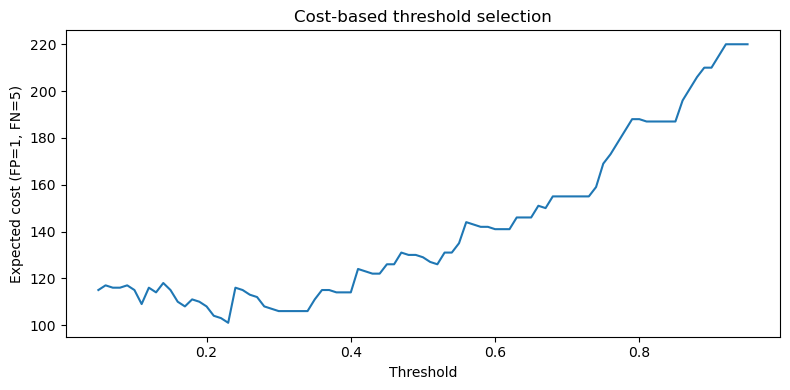

Best threshold (cost-based): 0.23
[[216  31]
 [ 14  33]]
              precision    recall  f1-score   support

           0      0.939     0.874     0.906       247
           1      0.516     0.702     0.595        47

    accuracy                          0.847       294
   macro avg      0.727     0.788     0.750       294
weighted avg      0.871     0.847     0.856       294



In [27]:
# 2) Cost-based thresholding
import matplotlib.pyplot as plt
def expected_cost(y_true: np.ndarray, scores: np.ndarray, threshold: float, cost_fp: float = 1.0, cost_fn: float = 5.0):
    y_pred = (scores >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp * cost_fp + fn * cost_fn

thresholds = np.linspace(0.05, 0.95, 91)
costs = [expected_cost(y_true, scores, t, cost_fp=1.0, cost_fn=5.0) for t in thresholds]
t_star = thresholds[int(np.argmin(costs))]

plt.figure(figsize=(8,4))
plt.plot(thresholds, costs)
plt.xlabel("Threshold")
plt.ylabel("Expected cost (FP=1, FN=5)")
plt.title("Cost-based threshold selection")
plt.tight_layout()
plt.show()

print("Best threshold (cost-based):", round(float(t_star), 3))
out_star = evaluate_on_test(best_model, X_test, y_test, threshold=float(t_star))
print(out_star["confusion_matrix"])
print(out_star["report"])

### Problem Solving - Top 20 at-risk shortlist (capacity-based decision)

In [28]:
# --- Top-20 at-risk shortlist (capacity-based decision product) ---

TOP_K = 20

# Ensure we have a clean NumPy array aligned with X_test row order
scores_arr = np.asarray(scores).reshape(-1)

# Rank indices by descending risk score
ranked_pos = np.argsort(-scores_arr)[:TOP_K]

# Grab the corresponding rows from X_test (keeps original index)
top_idx = X_test.iloc[ranked_pos].index

# Choose an identifier for managers:
# Prefer EmployeeNumber if you kept it somewhere; otherwise use the row index.
# If you dropped EmployeeNumber from X, but it's still in the original df, you can recover it via df.loc[top_idx, "EmployeeNumber"].
if "EmployeeNumber" in X_test.columns:
    employee_id = X_test.loc[top_idx, "EmployeeNumber"]
elif "df" in globals() and "EmployeeNumber" in df.columns:
    employee_id = df.loc[top_idx, "EmployeeNumber"]
else:
    employee_id = top_idx  # fallback: row index as surrogate ID

# Pick a small set of "manager-readable" columns if they exist (avoid dumping 60+ fields)
preferred_cols = [
    "Department", "JobRole", "OverTime",
    "JobSatisfaction", "EnvironmentSatisfaction", "RelationshipSatisfaction",
    "WorkLifeBalance", "JobLevel",
    "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
    "MonthlyIncome", "Age", "DistanceFromHome"
]
cols_to_show = [c for c in preferred_cols if c in X_test.columns]

shortlist = X_test.loc[top_idx, cols_to_show].copy()
shortlist.insert(0, "EmployeeID", employee_id.values if hasattr(employee_id, "values") else employee_id)

shortlist["risk_score"] = scores_arr[ranked_pos]
shortlist["risk_rank"] = np.arange(1, TOP_K + 1)

# Sort explicitly by risk score (descending)
shortlist = shortlist.sort_values("risk_score", ascending=False)

print("Top-20 at-risk shortlist (ranked):")
display(shortlist)

# Optional: quick validation metrics for the shortlist
y_test_arr = np.asarray(y_test)
precision_at_k = y_test_arr[ranked_pos].mean()
recall_at_k = y_test_arr[ranked_pos].sum() / y_test_arr.sum() if y_test_arr.sum() else np.nan
print(f"Precision@{TOP_K}: {precision_at_k:.3f}")
print(f"Recall@{TOP_K}:    {recall_at_k:.3f}")


Top-20 at-risk shortlist (ranked):


,EmployeeID,Department,JobRole,OverTime,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobLevel,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,MonthlyIncome,Age,DistanceFromHome,risk_score,risk_rank
911,911,Sales,Sales Representative,Yes,4,3,4,3,1,1,0,1,1118,25,24,0.986883,1
357,357,Sales,Sales Representative,Yes,2,1,3,3,1,3,2,1,2174,21,1,0.985341,2
688,688,Sales,Sales Representative,Yes,2,4,2,4,1,1,0,0,2121,19,21,0.975375,3
525,525,Sales,Sales Executive,No,3,1,1,3,2,2,2,2,4577,24,3,0.916102,4
1021,1021,Sales,Sales Representative,No,1,1,1,3,1,3,2,2,4400,25,9,0.901111,5
239,239,Research & Development,Laboratory Technician,Yes,3,4,4,1,1,3,2,1,3730,32,1,0.888359,6
301,301,Sales,Sales Representative,No,3,4,1,3,1,0,0,0,1200,18,10,0.886941,7
514,514,Research & Development,Research Scientist,Yes,1,1,1,3,1,10,8,9,3348,33,3,0.871621,8
946,946,Sales,Sales Executive,Yes,2,4,3,3,3,5,4,1,9094,40,25,0.866991,9
762,762,Research & Development,Research Scientist,Yes,1,1,2,3,1,3,2,1,2042,26,2,0.855572,10


Precision@20: 0.800
Recall@20:    0.340


### Calibration
- Probabilities you can trust (honest)

If HR uses risk scores for prioritization, probability calibration can matter.

We compare:
- Brier score (lower is better)
    -  Brier is mean squared error of predicted probabilities; lower is better.
- Calibration curve (visual)

Brier (uncalibrated):  0.0913
Brier (calibrated) : 0.0947


<Figure size 600x600 with 0 Axes>

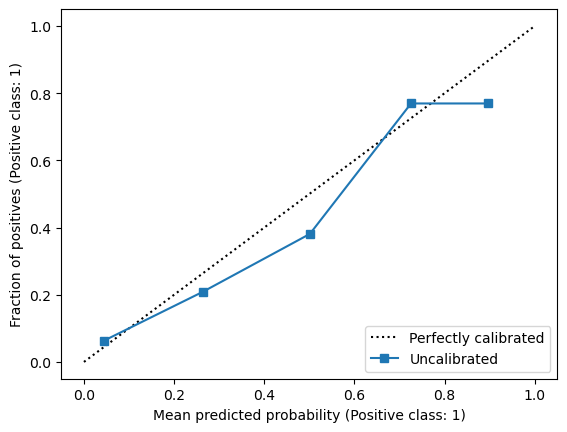

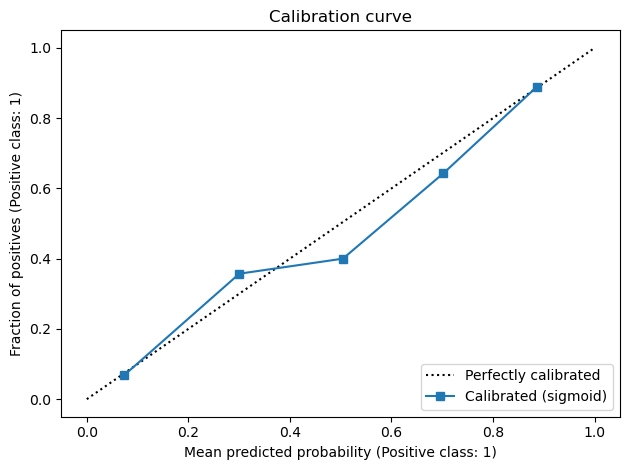

In [29]:
# Calibration requires probabilites in [0,1]
# If the chosen model does not expose predict_proba (eg. linearSVC)
# we calibrate it and report calibrated probabilities only. 

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.metrics import brier_score_loss

if hasattr(best_model, "predict_proba"):
    scores_uncal = best_model.predict_proba(X_test)[:,1]
    print("Brier (uncalibrated): ",  round(brier_score_loss(y_test, scores_uncal), 4))

    cal = CalibratedClassifierCV(best_model, method="sigmoid", cv=5)
    cal.fit(X_train, y_train)
    scores_cal = cal.predict_proba(X_test)[:,1]
    print("Brier (calibrated) :", round(brier_score_loss(y_test, scores_cal), 4))

    plt.figure(figsize=(6,6))
    CalibrationDisplay.from_predictions(y_test, scores_uncal, name="Uncalibrated")
    CalibrationDisplay.from_predictions(y_test, scores_cal, name="Calibrated (sigmoid)")
    plt.title("Calibration curve")
    plt.tight_layout()
    plt.show()
else:
    cal = CalibratedClassifierCV(best_model, method="sigmoid", cv=5)
    cal.fit(X_train, y_train)
    scores_cal = cal.predict_proba(X_test)[:,1]
    print("Model has no predict_proba; reporting calibrated probabilities only.")
    print("Brier (calibrated) :", round(brier_score_loss(y_test, scores_cal), 4))

    plt.figure(figsize=(6,6))
    CalibrationDisplay.from_predictions(y_test, scores_cal, name="Calibrated (sigmoid)")
    plt.title("Calibration curve (calibrated model)")
    plt.tight_layout()
    plt.show()


The original probabilities is good enough (its Brier is even smaller than the calibrated Brier score).


### Feature Importance
- Permutation importance - on the final pipeline (original feature names)
- Top coefficients - (for linear models) mapped back to one-hot heature names

Coefficients vs Permutation importance
- If you want interpretable directional effects and your model is linear: coefficients (convert to odds ratios with exp(coef)).
- If you want “what drives predictive power” for any model: permutation importance on a holdout set.

In [30]:
from sklearn.inspection import permutation_importance
perm = permutation_importance(
    best_model, X_test, y_test, 
    n_repeats=10, random_state=42, n_jobs=-1,
    scoring="average_precision"
)

imp = pd.DataFrame({
    "feature": X_test.columns, 
    "importance_mean": perm.importances_mean, 
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

imp.head(15)

,feature,importance_mean,importance_std
18,OverTime,0.231738,0.033850
17,NumCompaniesWorked,0.065607,0.016910
13,JobSatisfaction,0.063669,0.008708
1,BusinessTravel,0.045998,0.023778
7,EnvironmentSatisfaction,0.042197,0.023836
28,YearsSinceLastPromotion,0.034920,0.022685
4,DistanceFromHome,0.029871,0.018604
22,StockOptionLevel,0.028442,0.021943
15,MonthlyIncome,0.028323,0.025605
25,WorkLifeBalance,0.028115,0.016414


importance_mean is the average drop in your metric (PR‑AUC in your case) when that feature is shuffled, across repeats. Bigger positive = more important.

importance_std is how much that drop varies across repeats. Bigger std = less stable (noisier) importance estimate.

How to read them:
- High mean, low std → consistently important.
- High mean, high std → potentially important but unstable (often correlated features).
- Mean near 0 with any std → likely not important.
- Negative mean → shuffling sometimes improves performance; feature may be noise or leakage.

The most important factor is OverTime, following NumCompaniesWorked, JobSatisfaction, BusinessTravel, and EvnironmentSatisfaction. 

In [31]:
# Coefficients (only if model is logistic regression)
if isinstance(best_model.named_steps["model"], LogisticRegression):
    # Get feature names after preprocessing
    ohe = best_model.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
    cat_feature_names = ohe.get_feature_names_out(cat_cols)
    feature_names = np.concatenate([cont_num_cols, cat_feature_names])

    coefs = best_model.named_steps["model"].coef_.ravel() #.ravel() flatten array to 1D
    coef_df = pd.DataFrame({"feature": feature_names, "coef": coefs})
    coef_df["abs_coef"] = coef_df["coef"].abs()
    display(coef_df.sort_values("coef", ascending=False).head(15))
    display(coef_df.sort_values("coef", ascending=True).head(15))
else:
    print("Coefficient inspection skipped (best model is not logistic regression).")

Coefficient inspection skipped (best model is not logistic regression).


## Day 56 - Report + Publish
- Wirte report.md
- Create presentation slides
- Push repo
- Finalize README
- Share on LinkedIn or Portfolio

- Goal: predict and rank employees at risk of attrition (positive rate ~16.1%) for a capacity‑limited shortlist.
- Workflow: EDA, preprocessing with pipelines, and baseline modeling across LogReg, SVMs, RandomForest, HistGB, XGBoost, LightGBM, and MLP.
- Model selection: champion by CV PR‑AUC is MLP (best CV PR‑AUC ~0.6533).
- Test performance: ROC‑AUC 0.863, PR‑AUC 0.635; 
- top‑K results include 
    - Top‑50 precision 0.580/recall 0.617, 
    - Top‑100 precision 0.370/recall 0.787, 
    - Top‑200 precision 0.225/recall 0.957.
- Decision product: generates a Top‑20 ranked shortlist; 
- calibration check shows uncalibrated Brier 0.0913 vs calibrated 0.0947 (uncalibrated better).
- Interpretability: permutation importance highlights OverTime, NumCompaniesWorked, JobSatisfaction, BusinessTravel, and EnvironmentSatisfaction as key drivers.